<a href="https://colab.research.google.com/github/wangjuan001/sandbox2019/blob/master/Copy_of_4_Advanced_Techniques_and_Convolutional_Neural_Nets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##__4: Advanced Techniques and Convolutional Neural Nets__

## Learning Objectives

In this notebook, we'll learn...
- what a convolutional layer is, and why they work well for image data;
- how to specify and fit a convnet in TensorFlow via the Keras API
- use of data augmentation in image analysis

Although our previous model seems to work pretty well, it regards pixel values as independent features, since we flattened the images. In reality, pixels are spatially related, and by flattening the data, we ignore more complex spatial information beyond pixel-to-pixel relationships that may improve predictive power.

### Using a GPU runtime

Convolutional nets are more expensive to train than fully connected neural nets. We will use GPU acceleration for this notebook to speed the process along. GPUs are in favor with machine learning enthusiasts because they are quick to process tensors and convolve images (this is, after all, a GPU's full-time job). You can switch to a GPU runtime by navigating to `Runtime > Change runtime type` in the Colab toolbar above.

## __What are Convolutional Neural Nets?__

The __convolutional neural network__ (or "convnet", or "CNN") uses alternating convolutional and max pooling layers to extract abstract features from image data.

### __Convolutional layer__

The workhorse in a CNN is the __convolutional layer__. The convolutional layer is composed of several __convolution filters__ (sometimes called "kernels"), which scan an image for certain shapes or features. A simplified example below illustrates how this works. When the "eye kernel" passes over an eye in the image, it activates, producing a large feature value:

![](https://i.stack.imgur.com/9bi5k.gif)

The kernel itself is a small matrix of weights, just a few pixels wide by a few pixels tall, and for color images, it has a depth equal to the number of color channels. It may seem from the example that kernels are complex, and thus need to be specified, but the weights for each kernel in the layer are actually learned by backpropagation.

### Convolution operation

Consider a  $3\times3$ filter for an image:

<img src="https://github.com/allemanau/NUIT_tensorflow/blob/master/images/conv_kernel.png?raw=1">

To get the convolution output, slide the filter over the image in each spot it fits, and take the weighted sum of the pixel values.

<br>

![](https://miro.medium.com/max/1070/1*Zx-ZMLKab7VOCQTxdZ1OAw.gif)

<br>

The convolutional output is a tensor of size

<br>
\begin{equation*}
\text{(image width - filter width + 1)} \times \text{(image height - filter height + 1)} \times (\text{number of channels})
\end{equation*}
<br>

A layer is a collection of filters, each learning different features of the training images. Then, the size of the resulting convolutional layer will be

<br>
\begin{equation*}
\text{(image width - filter width + 1)} \times \text{(image height - filter height + 1)} \times (\text{number of channels} = 1) \times (\text{number of filters})
\end{equation*}
<br>

Organizing convolutional layers is something of an art. In general, the key thing to remember is that __larger filter sizes extract generic global features__, while __smaller filter sizes extract complex local features__. Using smaller filter sizes also enables construction of a deeper network, potentially yielding performance gains at the cost of increased training and prediction time.

### __Pooling__

One problem with convolutional filters is that they activate precisely where the feature appears. A __pooling layer__ solves this problem by dividing a convolution filter into __patches__ and summarizing the content of the filter in that region. An extrapolation of the simple example above helps to illustrate how a pooling layer captures the same signature from a shifted version of the image:

<br>

![](https://i0.wp.com/www.thushv.com/wp-content/uploads/2018/05/pooling.gif?resize=1100%2C829)

<br>

This particular variant of pooling is called __max pooling__; it takes the largest activation value from the convolution patch to be the feature value in the pooling layer.

### __Stacking convolutional and pooling layers to learn high level features__

With the two primary tools of a CNN in hand, the general principle is to apply a convolutional layer, then a pooling layer, then another convolutional layer, and so on. We will do this for the MNIST data set in a moment.

For novel problems, you can treat the layer sizes as parameters and tune them using a validation or cross-validation approach. Alternatively, you can adapt successful architectures others have built, [such as AlexNet](https://towardsdatascience.com/alexnet-the-architecture-that-challenged-cnns-e406d5297951), or even fine-tune the existing model for your problem via transfer learning (see the take-home exercise for more on this).



Although there are a few aspects and tricks of convolutional layers left unexplained, we have enough in hand to apply 2D convolutional and max pooling layers to MNIST.

In [ ]:
# Load libraries
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, ActivityRegularization, Input, Reshape, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import plot_model, to_categorical

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


# Load MNIST data
mnist = tf.keras.datasets.mnist
(x_train, raw_y_train), (x_test, raw_y_test) = mnist.load_data()
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

x_train_scl = x_train / 255.0
x_test_scl = x_test / 255.0

y_train = to_categorical(raw_y_train, num_classes = 10)
y_test = to_categorical(raw_y_test, num_classes = 10)

loss_fn = 'categorical_crossentropy'
optim = 'adam'
batch_size = 500

conv_model = Sequential()
conv_model.add(Reshape((28, 28, 1)))
conv_model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28,28)))
conv_model.add(Conv2D(64, (3, 3)))
conv_model.add(Activation('relu'))
conv_model.add(MaxPooling2D(pool_size=(2, 2)))
conv_model.add(Dropout(0.2))
conv_model.add(Flatten())
conv_model.add(Dense(128))
conv_model.add(Activation('relu'))
conv_model.add(Dropout(0.5))
conv_model.add(Dense(10))
conv_model.add(Activation('softmax'))


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


11493376/11490434 [==============================] - 0s 0us/step


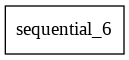

In [ ]:
conv_model = Sequential()
conv_model.add(Reshape((28, 28, 1)))
#conv_model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28,28)))
#conv_model.add(Conv2D(64, (3, 3)))
#conv_model.add(Activation('relu'))
#conv_model.add(MaxPooling2D(pool_size=(2, 2)))
#conv_model.add(Dropout(0.2))
conv_model.add(Flatten())
conv_model.add(Dense(128))
conv_model.add(Activation('relu'))
conv_model.add(Dropout(0.5))
conv_model.add(Dense(10))
conv_model.add(Activation('softmax'))
plot_model(conv_model)

In [ ]:
conv_model.compile(optimizer = optim,
              loss = loss_fn,
              metrics = ['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', 
                                            patience=5, 
                                            restore_best_weights = True)

conv_model.fit(x_train_scl, 
          y_train, 
          batch_size = batch_size,
          epochs = 50,
          validation_split = 0.1,
          callbacks = [callback])

Epoch 1/50

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

108/108 [==============================] - 5s 43ms/step - loss: 0.4030 - accuracy: 0.8758 - val_loss: 0.0757 - val_accuracy: 0.9797
Epoch 2/50
108/108 [==============================] - 4s 41ms/step - loss: 0.1210 - accuracy: 0.9645 - val_loss: 0.0536 - val_accuracy: 0.9868
Epoch 3/50
108/108 [==============================] - 4s 40ms/step - loss: 0.0881 - accuracy: 0.9736 - val_loss: 0.0465 - val_accuracy: 0.9877
Epoch 4/50
108/108 [==============================] - 4s 40ms/step - loss: 0.07

Our convolutional model, along with the other improvements made along the way, demonstrates superior performance -- ~99% accurate! For reference, the best kernel on Kaggle for MNIST is 99.75% accurate (and is quite a bit more complicated).

In [ ]:
conv_model.evaluate(x_test_scl,
               y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0359 - accuracy: 0.9895


[0.03586503863334656, 0.9894999861717224]

Again, let's peek at a selection of mistakes. Hard to blame the model for these.

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


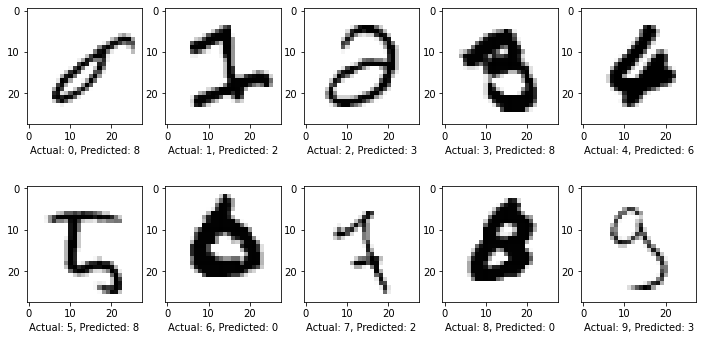

In [ ]:
# Get predicted classes.
preds = conv_model.predict_classes(x_test_scl)

# Prepare a figure for subplotting.
fig = plt.figure(figsize=(12, 6))

# Select one random misclass for each digit in the data set.
for i in range(10):
    ind = np.random.choice(np.ndarray.flatten(np.argwhere((raw_y_test == i) & (raw_y_test != preds))))
    actual = raw_y_test[ind]
    predicted = preds[ind]
    plottable_image = np.reshape(x_test[ind], (28, 28))
    ax = fig.add_subplot(2, 5, i+1)
    ax.imshow(plottable_image, cmap='gray_r')
    plt.xlabel("Actual: " + "{}".format(actual) + ", Predicted: " + "{}".format(predicted))

## __Data Augmentation__

An extremely useful trick to boost performance is to apply random __label-preserving transformations__ to create new training examples. These transformations include shifting and stretching images, adding small perturbations to the pixel values, and so on. This practice, called __data augmentation__, improves the ability of the model to generalize to unseen examples exhibiting these small changes. Keras provides an easy-to-use data augmentation toolkit. Let's explore it a bit on a single image:

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

The `ImageDataGenerator` object will ultimately replace our training set. The object uses a training set as a source to generate batches of new observations from dynamically. The list of label-preserving transformations are

- rotation
- positional shift
- brightness
- shear
- zoom
- vertical/horizontal flip
- others, see [`ImageDataGenerator` docs](https://keras.io/preprocessing/image/#imagedatagenerator-class)

Let's try a simple generator that only shifts observations:


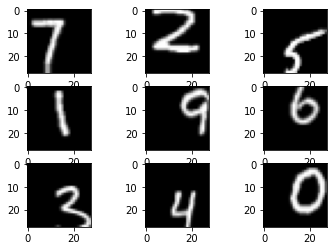

In [ ]:
# Can specify as a fraction of total width. Let's set to 30% to demonstrate:
train_gen = ImageDataGenerator(
    width_shift_range=0.3,
    height_shift_range=0.3)

for x_batch, y_batch in train_gen.flow(x_train, y_train, batch_size=9):
	for i in range(0, 9):
		plt.subplot(330 + 1 + i)
		plt.imshow(x_batch[i].reshape(28, 28), cmap = plt.get_cmap('gray'))
	plt.show()
	break

We can add rotation and shear if so desired:

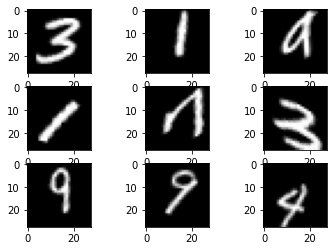

In [ ]:
# Rotation range is in degrees. Shear range is 
train_gen = ImageDataGenerator(
    rotation_range = 20,
    shear_range = 30,
    width_shift_range=0.15,
    height_shift_range=0.15)

for x_batch, y_batch in train_gen.flow(x_train, y_train, batch_size=9):
	for i in range(0, 9):
		plt.subplot(330 + 1 + i)
		plt.imshow(x_batch[i].reshape(28, 28), cmap = plt.get_cmap('gray'))
	plt.show()
	break

Even though flips don't make sense for our data, we could add them:

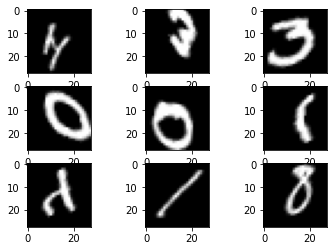

In [ ]:
# Rotation range is in degrees. Shear range is 
train_gen = ImageDataGenerator(
    rotation_range = 20,
    shear_range = 30,
    width_shift_range=0.15,
    height_shift_range=0.15,
    horizontal_flip = True,
    vertical_flip = True)

for x_batch, y_batch in train_gen.flow(x_train, y_train, batch_size=9):
	for i in range(0, 9):
		plt.subplot(330 + 1 + i)
		plt.imshow(x_batch[i].reshape(28, 28), cmap = plt.get_cmap('gray'))
	plt.show()
	break

Let's set up a generator to transform the training set, and train a model using a random continuous `flow()` of these examples.

In [ ]:
# Set up a generator. Params:
# Random rotation between +/- 8 degrees
# Random translations of +/- 8% of total width
# Random zooms of +/- 8% of total size.
# Random shear of +/- 15 degrees
train_gen = ImageDataGenerator(rotation_range = 8, 
                               width_shift_range = 0.08, 
                               shear_range = 15, 
                               height_shift_range = 0.08, 
                               zoom_range = 0.08 )

# Set up a flow from our generator.
train_set = train_gen.flow(x_train_scl, y_train, batch_size = batch_size)

# Set up a second validation flow from the same generator.
val_set = train_gen.flow(x_train_scl, y_train, batch_size=100)

# Set up and compile model.
conv_model = Sequential()
conv_model.add(Reshape((28, 28, 1)))
conv_model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28,28)))
conv_model.add(Conv2D(64, (3, 3)))
conv_model.add(Activation('relu'))
conv_model.add(MaxPooling2D(pool_size=(2, 2)))
conv_model.add(Dropout(0.2))
conv_model.add(Flatten())
conv_model.add(Dense(128))
conv_model.add(Activation('relu'))
conv_model.add(Dropout(0.5))
conv_model.add(Dense(10))
conv_model.add(Activation('softmax'))

conv_model.compile(optimizer = optim,
              loss = loss_fn,
              metrics = ['accuracy'])

# Validation steps argument only applies when ImageDataGenerator is used.
# Since the training data is changing on each epoch, overfitting is difficult.
# So, no callback. We'll just train for 40 epochs.
conv_model.fit(train_set, 
                         steps_per_epoch = 60000//batch_size, 
                         validation_data = val_set, 
                         validation_steps = 10000//batch_size, 
                         epochs = 40)

Epoch 1/40
120/120 [==============================] - 22s 184ms/step - loss: 0.6009 - accuracy: 0.8091 - val_loss: 0.1913 - val_accuracy: 0.9425
Epoch 2/40
120/120 [==============================] - 22s 185ms/step - loss: 0.2351 - accuracy: 0.9276 - val_loss: 0.1173 - val_accuracy: 0.9635
Epoch 3/40
120/120 [==============================] - 22s 183ms/step - loss: 0.1778 - accuracy: 0.9460 - val_loss: 0.0889 - val_accuracy: 0.9720
Epoch 4/40
120/120 [==============================] - 22s 182ms/step - loss: 0.1574 - accuracy: 0.9537 - val_loss: 0.0630 - val_accuracy: 0.9800
Epoch 5/40
120/120 [==============================] - 22s 184ms/step - loss: 0.1396 - accuracy: 0.9576 - val_loss: 0.0803 - val_accuracy: 0.9765
Epoch 6/40
120/120 [==============================] - 22s 184ms/step - loss: 0.1303 - accuracy: 0.9605 - val_loss: 0.0671 - val_accuracy: 0.9750
Epoch 7/40
120/120 [==============================] - 22s 184ms/step - loss: 0.1253 - accuracy: 0.9623 - val_loss: 0.0592 - val_ac

Evaluation should yield accuracy of around 99.4%, about 0.4% off the best known classifier. To boost this much higher, complicating the model architecture is the next step. To see how, I encourage you to check out examples on Kaggle; for instance, [this one hits 99.7% accuracy](https://www.kaggle.com/yassineghouzam/introduction-to-cnn-keras-0-997-top-6).

In [ ]:
conv_model.evaluate(x_test_scl, y_test)

The unfortunate truth is that some people have poor handwriting:

In [ ]:
# Get predicted classes.
preds = conv_model.predict_classes(x_test_scl)

# Prepare a figure for subplotting.
fig = plt.figure(figsize=(12, 6))

# Select one random misclass for each digit in the data set.
for i in range(10):
    ind = np.random.choice(np.ndarray.flatten(np.argwhere((raw_y_test == i) & (raw_y_test != preds))))
    actual = raw_y_test[ind]
    predicted = preds[ind]
    plottable_image = np.reshape(x_test[ind], (28, 28))
    ax = fig.add_subplot(2, 5, i+1)
    ax.imshow(plottable_image, cmap='gray_r')
    plt.xlabel("Actual: " + "{}".format(actual) + ", Predicted: " + "{}".format(predicted))

## __Conclusion & Recap__

Today, we discussed fundamentals of deep learning in TensorFlow, including network architecture, parameter tuning, validation, callbacks, convnets, and data augmentation. As you might guess, though, there's a lot more to learn. Some things we didn't discuss in case you are interested:

- __Recurrent__ and __long short-term memory__ networks (RNN, LSTM) for time series or text data
- __Transfer learning__ for adapting pretrained models to new problems
- __Autoencoders__ and __self-organizing maps__ for unsupervised learning
- Using TensorFlow to write __custom layers__ for a learning model

Thanks for your time! If you have any questions regarding anything we discussed today, or want help with your own project in TensorFlow, feel free to file a [consultation request with Research Computing Services](https://www.it.northwestern.edu/research/consultation/data-services.html). For more resources and exercises, check out the [Research Computing Services Blog](https://sites.northwestern.edu/researchcomputing/2020/05/01/online-learning-resources-deep-learning-with-tensorflow/).